In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from tabulate import tabulate

# Part 1: Data Exploration

In [ ]:
# Load dataset
data = pd.read_csv("bike_share_hour.csv")

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
print(data["season"].unique())

[1 2 3 4]


In [ ]:
# Categorical values are already converted
data = data.drop(columns=["dteday"])
data.dropna()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
def bar_chart(df, x_axis, y_axis):
  # Sum for each unique x value
  for x in df[x_axis].unique():
    # Get the columns
    sum = df.loc[df[x_axis]==x]
    # Sum over that column
    sum = sum[y_axis].sum()
    plt.bar(x, sum)
  
  plt.ylabel = y_axis # Neither label appears, can't figure out why
  plt.xlabel = x_axis

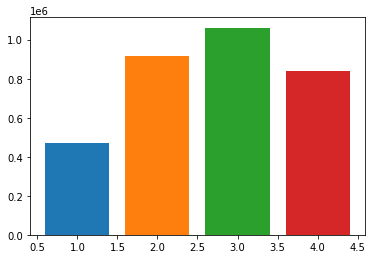

In [ ]:
 # CNT vs season total bar graph
bar_chart(data, "season","cnt")

# Season 3 (Fall?) has the most bike rides
# Season 1 (Spring?) has the least bike rides

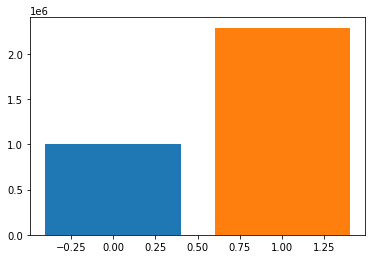

In [ ]:
 # Working day vs count bar graph
 # 1 is a work day, 0 isn't
bar_chart(data, "workingday", "cnt")

# A majority of bike rides are on working days

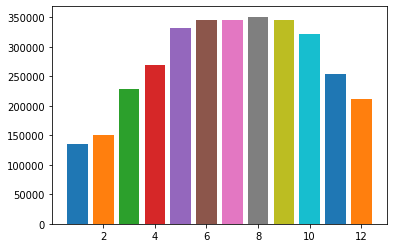

In [ ]:
 # Month vs count total bar graph
bar_chart(data, "mnth", "cnt")

# Most bike rides are in the summer (the middle of
# the year), before steeply dropping in october to
# november

In [ ]:
def month_to_season(month):
  return np.ceil(month / 3)

#for x in range(1, 13):
#  print(month_to_season(x))

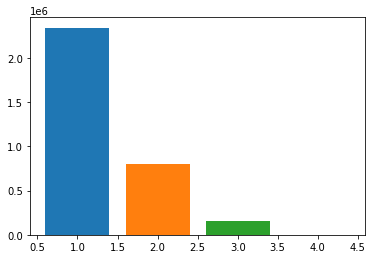

In [ ]:
 # Weather vs count total bar graph
bar_chart(data, "weathersit", "cnt")

# No clue what each value means

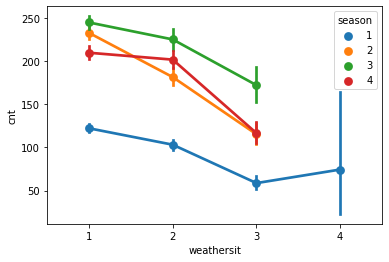

In [ ]:
# Weather and season vs count
ax = sns.pointplot(x="weathersit", y="cnt", hue="season", data=data)

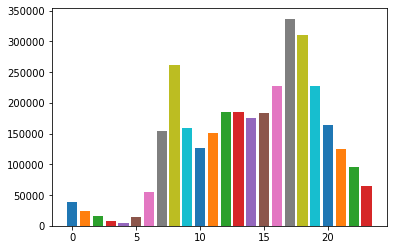

In [ ]:
 # Hour vs count bar graph
bar_chart(data, "hr", "cnt")

# In the morning bikes peak at 8 A.M., anad in the afternoon peak at 5 and 6 P.M.

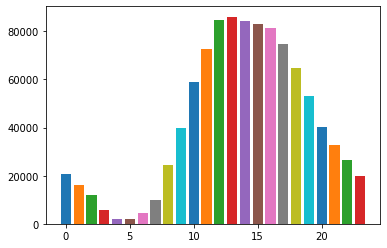

In [ ]:
 # Hour vs count on weekends/holidays bar graph
no_work_data = data[data["workingday"]==0]
bar_chart(no_work_data, "hr", "cnt")

# Without workdays, bike rides fluctuate smoothly, peaking afternoon

# Part 2: Data Preparation

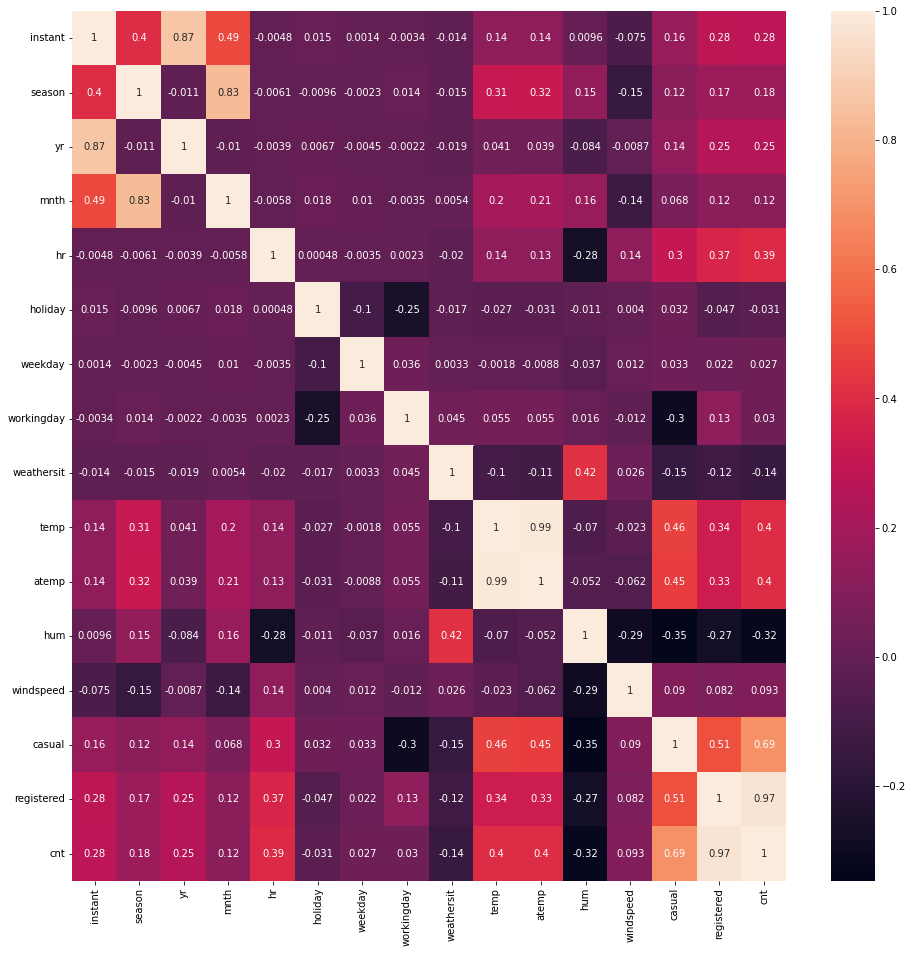

In [ ]:
# Show correlation between variables
corr_matrix = data.corr()

plt.figure(figsize=(16,16))
ax= sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Data already scaled?
scalar = StandardScaler()
scalar.fit(data)
scalar.transform(data)

array([[-1.73195115, -1.3566343 , -1.0051343 , ..., -0.66275506,
        -0.93018925, -0.95633924],
       [-1.73175182, -1.3566343 , -1.0051343 , ..., -0.56134262,
        -0.80465484, -0.82402209],
       [-1.73155249, -1.3566343 , -1.0051343 , ..., -0.62219008,
        -0.83769021, -0.8681278 ],
       ...,
       [ 1.73155249, -1.3566343 ,  0.99489192, ..., -0.58162511,
        -0.46769408, -0.54836135],
       [ 1.73175182, -1.3566343 ,  0.99489192, ..., -0.45993017,
        -0.69894166, -0.70824458],
       [ 1.73195115, -1.3566343 ,  0.99489192, ..., -0.48021266,
        -0.77161947, -0.77440315]])

In [ ]:
# Drop columns
print(data)
data = data.drop(columns=["instant", "casual", "registered"])

       instant  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1       1   0     1   0        0        6           0   
1            2       1   0     1   1        0        6           0   
2            3       1   0     1   2        0        6           0   
3            4       1   0     1   3        0        6           0   
4            5       1   0     1   4        0        6           0   
...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375       1   1    12  19        0        1           1   
17375    17376       1   1    12  20        0        1           1   
17376    17377       1   1    12  21        0        1           1   
17377    17378       1   1    12  22        0        1           1   
17378    17379       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879  0.81     0.0000       3          13   16  
1      

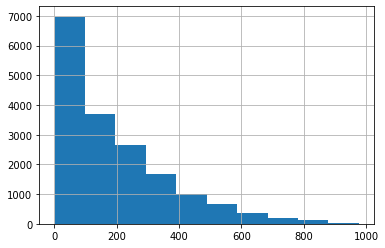

In [ ]:
ax = data["cnt"].hist()
# This distribution is skewed right

In [ ]:
# Test/train split
X = data
y = X.pop("cnt")

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=1/3, random_state=42)

In [ ]:
# Train linear regression
lin_reg = LinearRegression().fit(X_train ,y_train)
lin_predictions = lin_reg.predict(X_train)

In [ ]:
# Print statistics
r2 = r2_score(y_train, lin_predictions)
print("r2:", r2)

MSE = mean_squared_error(y_train, lin_predictions)
print("MSE:", MSE)

RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

r2: 0.3876880245874115
MSE: 20462.78974011677
RMSE: 143.04820774870535


# Part 3: Model Training

In [ ]:
# Convert categorical variables into dummy variables
encoded_data = pd.get_dummies(data=data, columns=["season", "yr", "mnth", "hr", "weekday", "weathersit"])

X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=1/3, random_state=42)

In [ ]:
# Test several different models and compare them
models = [
    LinearRegression(), 
    DecisionTreeRegressor(random_state=0), 
    RandomForestRegressor(random_state=0, n_estimators=30), 
    SGDRegressor(max_iter=1000, tol=1e-3), 
    linear_model.Lasso(alpha=0.1), 
    ElasticNet(random_state=0), 
    Ridge(alpha=0.5), 
    BaggingRegressor()]

table = pd.DataFrame(columns=["Model", "r2 coefficient", "MSE", "RMSE"])

In [ ]:
for model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_train)

  r2 = r2_score(y_train, predictions)
  MSE = mean_squared_error(y_train, predictions)
  RMSE = np.sqrt(MSE)

  table.loc[len(table.index)] = [model, r2, MSE, RMSE]

In [ ]:
# Show table
print(tabulate(table, headers='keys', tablefmt='psql'))

+----+--------------------------------------------------------+------------------+--------------+------------+
|    | Model                                                  |   r2 coefficient |          MSE |       RMSE |
|----+--------------------------------------------------------+------------------+--------------+------------|
|  0 | LinearRegression()                                     |         0.688702 | 10403.2      | 101.996    |
|  1 | DecisionTreeRegressor(random_state=0)                  |         0.999996 |     0.119282 |   0.345372 |
|  2 | RandomForestRegressor(n_estimators=30, random_state=0) |         0.986387 |   454.948    |  21.3295   |
|  3 | SGDRegressor()                                         |         0.688469 | 10411        | 102.034    |
|  4 | Lasso(alpha=0.1)                                       |         0.688558 | 10408        | 102.02     |
|  5 | ElasticNet(random_state=0)                             |         0.198938 | 26770.6      | 163.617    |
|

# Part 4: Model Tuning

In [ ]:
# Get the three models with the lowest mean squared error
table = table.sort_values("MSE")[:3]

In [ ]:
# Implement cross-validation on top 3 models
cross_val_scores = []

for model in table["Model"]:
  cross_val = cross_val_score(model, X_train, y_train)
  cross_val_scores.append(cross_val[4])

In [ ]:
table["Cross Validation Score"] = cross_val_scores
print(tabulate(table, headers='keys', tablefmt='psql'))

+----+--------------------------------------------------------+------------------+------------+-----------+--------------------------+
|    | Model                                                  |   r2 coefficient |        MSE |      RMSE |   Cross Validation Score |
|----+--------------------------------------------------------+------------------+------------+-----------+--------------------------|
|  1 | DecisionTreeRegressor(random_state=0)                  |         0.999996 |   0.119282 |  0.345372 |                 0.828438 |
|  2 | RandomForestRegressor(n_estimators=30, random_state=0) |         0.986387 | 454.948    | 21.3295   |                 0.91112  |
|  7 | BaggingRegressor()                                     |         0.98345  | 553.077    | 23.5176   |                 0.905694 |
+----+--------------------------------------------------------+------------------+------------+-----------+--------------------------+


In [ ]:
# Find model with the highest cross-validation score
table = table.sort_values("Cross Validation Score", ascending=False)[:1]
print(tabulate(table, headers='keys', tablefmt='psql'))

+----+--------------------------------------------------------+------------------+---------+---------+--------------------------+
|    | Model                                                  |   r2 coefficient |     MSE |    RMSE |   Cross Validation Score |
|----+--------------------------------------------------------+------------------+---------+---------+--------------------------|
|  2 | RandomForestRegressor(n_estimators=30, random_state=0) |         0.986387 | 454.948 | 21.3295 |                  0.91112 |
+----+--------------------------------------------------------+------------------+---------+---------+--------------------------+


In [ ]:
print(table["Model"].iloc[0])

RandomForestRegressor(n_estimators=30, random_state=0)


In [ ]:
# Randomize search cv with the highest cv score model
param_distribs = {
        'bootstrap': [True, False],
        'max_depth': range(10, 120, 10), # 10 - 110
        'max_features': ["auto", "sqrt"],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1,2,4],
        'n_estimators': range(20, 220, 20) # 20 - 200
    }

rnd_search = RandomizedSearchCV(table["Model"].iloc[0], param_distribs, n_jobs=3, n_iter=20, cv=3)

In [ ]:
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=30,
                                                   random_state=0),
                   n_iter=20, n_jobs=3,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(10, 120, 10),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': range(20, 220, 20)})

In [ ]:
rnd_search.best_params_

{'n_estimators': 160,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
# Create a model using the results of the search
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(X_train)

In [ ]:
final_r2 = r2_score(y_train, final_predictions)
print("r2:", final_r2)

final_MSE = mean_squared_error(y_train, final_predictions)
print("MSE:", final_MSE)

final_RMSE = np.sqrt(final_MSE)
print("RMSE:", final_RMSE)

print("Cross Validation Score:", cross_val_score(final_model, X_train, y_train))

r2: 0.9749864738280627
MSE: 835.924409889859
RMSE: 28.912357390739672
Cross Validation Score: [0.89425593 0.89533281 0.90485213 0.90788698 0.91000529]


In [ ]:
# Evluate on test set
print("Test r2:", r2_score(y_test, final_model.predict(X_test)))
print("Test RMSE:", mean_squared_error(y_test, final_model.predict(X_test), squared=False))

Test r2: 0.9193108457427535
Test RMSE: 50.68753625392082
